1/1 [==============================] - 0s 11ms/step


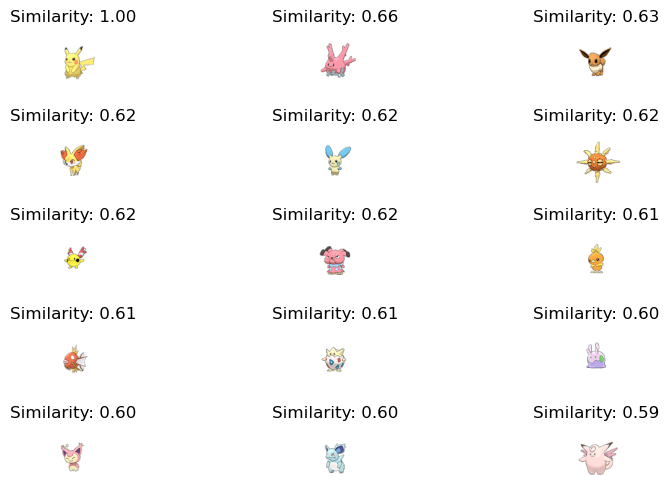

In [8]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 이미지 경로
image_folder = "./images"

# 모든 이미지 파일 읽기(이미지 폴더에 있는 모든 파일을 보고 .png, .jpg, .jpeg로 된 것만 리턴함)
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# VGG16 모델 불러오기
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)) # fc layer는 포함 안함

# 이미지 특징 추출 함수
def extract_features(img_path, model):
    img = cv2.imread(img_path) # 이미지 불러오기
    img = cv2.resize(img, (224, 224)) # 이미지 크기 조정
    img = np.expand_dims(img, axis=0) # 차원 추가
    img = preprocess_input(img) # 모델에 집어 넣기
    features = model.predict(img) # 학습된 모델 예측
    return features.flatten() # 평탄화 하고 리턴

# 모든 이미지의 특징 추출
features_dict = {}
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    features = extract_features(image_path, model)
    features_dict[image_file] = features

# 사용자가 선택한 이미지에 대한 특징 추출
selected_image_path = f"{image_folder}/pikachu.png"
selected_image_features = extract_features(selected_image_path, model)

# 코사인 유사도 계산
similarities = {}
for image_file, features in features_dict.items():
    similarity = cosine_similarity([selected_image_features], [features])[0][0] # 첫 번째 벡터와 자기 자신 간의 유사도
    similarities[image_file] = similarity

# 유사도가 높은 순으로 이미지 정렬
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True) #유사도 값 기준으로 정렬 내림차순

top_k = 15 #몇 개 뽑을 것인지
num_cols = 3  # 열의 수
num_rows = (top_k + num_cols - 1) // num_cols  # 행의 수 계산

fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 6)) #서브 플롯 형성

for i in range(top_k):
    similar_image_path = os.path.join(image_folder, sorted_similarities[i][0]) #이미지 경로
    similarity_score = sorted_similarities[i][1] # 유사도 

    # 이미지를 Matplotlib을 사용하여 표시
    row = i // num_cols # 행 계산
    col = i % num_cols # 열 계산
    axes[row, col].imshow(imread(similar_image_path)) #이미지 불러서 위치시키기
    axes[row, col].set_title(f"Similarity: {similarity_score:.2f}") # 유사도 불러와서 위치시키기
    axes[row, col].axis("off") #이미지 축 삭제

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간의 간격 조정 (wspace = 가로 간격 , hspace = 세로 간격)
plt.show()